In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(r"D:\python\projects\banking_system\Katowice mieszkania")
df.head()

,name,metrage in m2,number of rooms,floor,balcony,price in zl,price per metre in zl
0,Mieszkanie po generalnym remoncie z garażem,"Powierzchnia46,5 m²",Liczba pokoi3,Piętro3/4,Balkon / ogród / taraszapytaj,510 000 zł,10 968 zł/m²
1,Sprzedam Mieszkanie Osiedle Ptasie Katowice Br...,Powierzchnia88 m²,Liczba pokoi4,Piętro1/3,"Balkon / ogród / tarasbalkon, taras",779 000 zł,8 852 zł/m²
2,Sprzedam 3 Pokojowe Mieszkanie 72m2,Powierzchnia72 m²,Liczba pokoi3,Piętro2/2,Balkon / ogród / taraszapytaj,310 000 zł,4 306 zł/m²
3,"Katowice, Asnyka, z antresolą","Powierzchnia82,21 m²",Liczba pokoi3,Piętro2/2,Balkon / ogród / tarasbalkon,597 611 zł,7 269 zł/m²
4,Z ogrodem 200 m2 i garażem!,Powierzchnia71 m²,Liczba pokoi3,Piętro1/2,Balkon / ogród / tarasogródek,490 000 zł,6 901 zł/m²


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4528 entries, 0 to 4527
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   4528 non-null   object
 1   metrage in m2          4528 non-null   object
 2   number of rooms        4528 non-null   object
 3   floor                  4528 non-null   object
 4   balcony                4528 non-null   object
 5   price in zl            4528 non-null   object
 6   price per metre in zl  3156 non-null   object
dtypes: object(7)
memory usage: 247.8+ KB


In [4]:
df = df.drop_duplicates()
df.head()

,name,metrage in m2,number of rooms,floor,balcony,price in zl,price per metre in zl
0,Mieszkanie po generalnym remoncie z garażem,"Powierzchnia46,5 m²",Liczba pokoi3,Piętro3/4,Balkon / ogród / taraszapytaj,510 000 zł,10 968 zł/m²
1,Sprzedam Mieszkanie Osiedle Ptasie Katowice Br...,Powierzchnia88 m²,Liczba pokoi4,Piętro1/3,"Balkon / ogród / tarasbalkon, taras",779 000 zł,8 852 zł/m²
2,Sprzedam 3 Pokojowe Mieszkanie 72m2,Powierzchnia72 m²,Liczba pokoi3,Piętro2/2,Balkon / ogród / taraszapytaj,310 000 zł,4 306 zł/m²
3,"Katowice, Asnyka, z antresolą","Powierzchnia82,21 m²",Liczba pokoi3,Piętro2/2,Balkon / ogród / tarasbalkon,597 611 zł,7 269 zł/m²
4,Z ogrodem 200 m2 i garażem!,Powierzchnia71 m²,Liczba pokoi3,Piętro1/2,Balkon / ogród / tarasogródek,490 000 zł,6 901 zł/m²


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3772 entries, 0 to 4525
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   3772 non-null   object
 1   metrage in m2          3772 non-null   object
 2   number of rooms        3772 non-null   object
 3   floor                  3772 non-null   object
 4   balcony                3772 non-null   object
 5   price in zl            3772 non-null   object
 6   price per metre in zl  2461 non-null   object
dtypes: object(7)
memory usage: 235.8+ KB


In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2461 entries, 0 to 4525
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   2461 non-null   object
 1   metrage in m2          2461 non-null   object
 2   number of rooms        2461 non-null   object
 3   floor                  2461 non-null   object
 4   balcony                2461 non-null   object
 5   price in zl            2461 non-null   object
 6   price per metre in zl  2461 non-null   object
dtypes: object(7)
memory usage: 153.8+ KB


In [7]:
#metrage
old_metrage = df["metrage in m2"]
new_metrage = []
for x in old_metrage:
    x = x.replace("Powierzchnia", "")
    x = x.replace(" m²", "")
    x = x.replace(",", ".")
    new_metrage.append(float(x))
df["metrage in m2"] = new_metrage

In [8]:
#rooms
old_number = df["number of rooms"]
new_number = []
for x in old_number:
    x = x.replace("Liczba pokoi", "")
    x = x.replace("więcej niż ", "10")
    x = x.strip()
    new_number.append(int(x))
df["number of rooms"] = new_number

In [9]:
#floor
old_floor = df["floor"]
new_floor = []
for x in old_floor:
    x = x.replace("Piętro", "")
    if "parter" in x:
        x = x.replace("parter", "0")
    if "poddasze" in x:
        x = x.replace("poddasze", "0")
    if ">" in x:
        x = x.replace(">", "")
    x = x.strip()
    new_floor.append(x)
df["floor"] = new_floor
df = df[df["floor"] != "zapytaj"] 
final_floor = []
for x in df["floor"]:
    final_floor.append(int(x[0]))
df["floor"] = final_floor

In [10]:
#balcony
new_balcony = []
for x in df["balcony"]:
    x = x.replace("Balkon / ogród / taras", "")
    if x == "balkon":
        x = 1
    else:
        x = 0
    new_balcony.append(x)
df["balcony"] = new_balcony

In [11]:
#price
new_price = []
for x in df["price in zl"]:
    x = x.replace("zł", "")
    x = x.replace(" ", "")
    x = x.replace(",", ".")
    new_price.append(int(float(x)))
df["price in zl"] = new_price

In [12]:
#price per metre
new_price_per_metre = []
for x in df["price per metre in zl"]:
    x = x.replace("zł/м²", "")
    x = x.replace("zł/m²", "")
    x = x.replace(" ", "")
    new_price_per_metre.append(int(x))
df["price per metre in zl"] = new_price_per_metre

In [13]:
df.head()

,name,metrage in m2,number of rooms,floor,balcony,price in zl,price per metre in zl
0,Mieszkanie po generalnym remoncie z garażem,46.50,3,3,0,510000,10968
1,Sprzedam Mieszkanie Osiedle Ptasie Katowice Br...,88.00,4,1,0,779000,8852
2,Sprzedam 3 Pokojowe Mieszkanie 72m2,72.00,3,2,0,310000,4306
3,"Katowice, Asnyka, z antresolą",82.21,3,2,1,597611,7269
4,Z ogrodem 200 m2 i garażem!,71.00,3,1,0,490000,6901


In [14]:
aparment_rooms = df.groupby("number of rooms").count()
aparment_rooms

,name,metrage in m2,floor,balcony,price in zl,price per metre in zl
number of rooms,,,,,,
1,246,246,246,246,246,246
2,890,890,890,890,890,890
3,845,845,845,845,845,845
4,382,382,382,382,382,382
5,34,34,34,34,34,34
6,11,11,11,11,11,11
7,4,4,4,4,4,4
8,1,1,1,1,1,1
9,1,1,1,1,1,1


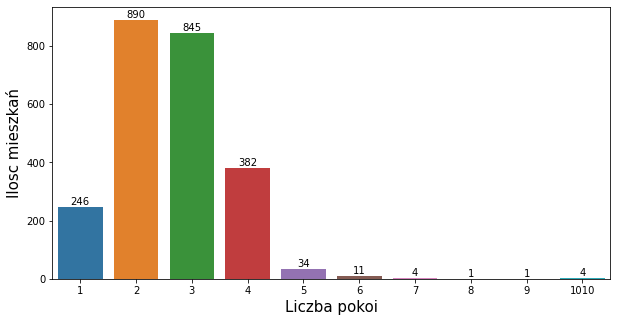

In [15]:
plt.figure(figsize=(10,5))

ax = sns.barplot(y=aparment_rooms.name,
            x=aparment_rooms.index)

plt.xlabel("Liczba pokoi", size=15)
plt.ylabel("Ilosc mieszkań", size=15)

for i in ax.containers:
    ax.bar_label(i,)

In [24]:
prize_per_num_rooms = df.groupby("number of rooms")["price in zl"].mean().round(0)
prize_per_num_rooms

number of rooms
1        293018.0
2        376917.0
3        511352.0
4        692454.0
5        902797.0
6        737627.0
7       1142500.0
8        790000.0
9       1290000.0
1010    1558500.0
Name: price in zl, dtype: float64

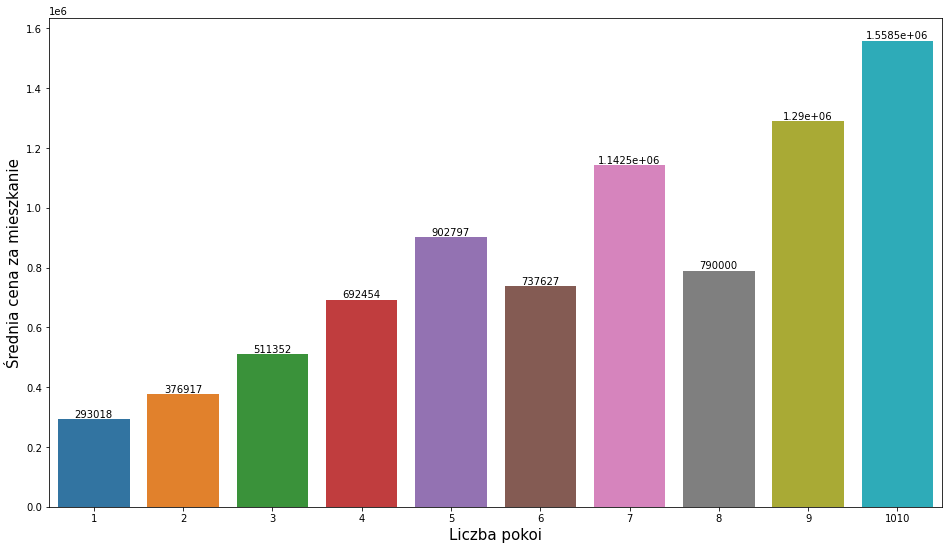

In [26]:
plt.figure(figsize=(16,9))

ax = sns.barplot(y=prize_per_num_rooms.values,
            x=prize_per_num_rooms.index)

plt.xlabel("Liczba pokoi", size=15)
plt.ylabel("Średnia cena za mieszkanie", size=15)

for i in ax.containers:
    ax.bar_label(i,)

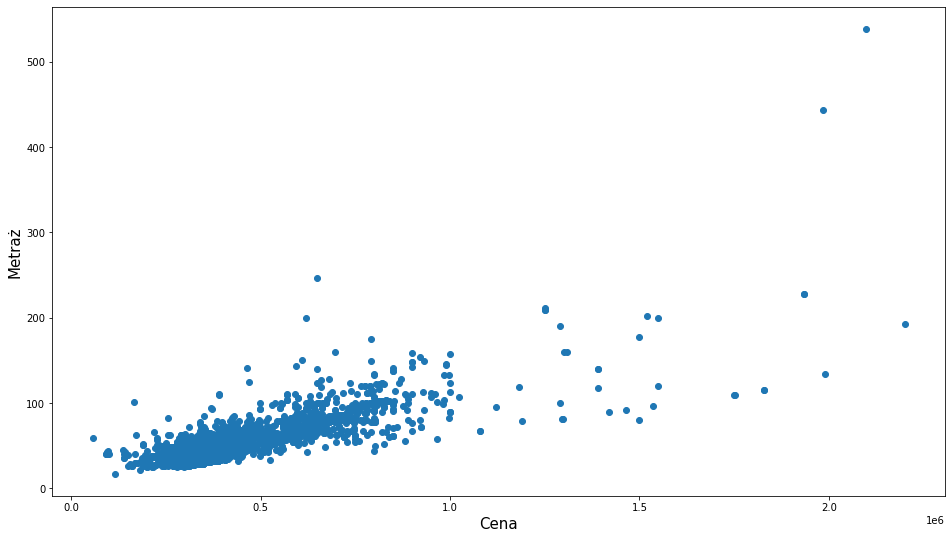

In [18]:
plt.figure(figsize=(16,9))
plt.xlabel("Cena", size=15)
plt.ylabel("Metraż", size=15)

plt.scatter(y=df["metrage in m2"],
           x=df["price in zl"])

In [19]:
num_of_balconies = df[df["balcony"] == 1].count()[0]
num_of_balconies

1194

In [20]:
X = df.iloc[:, 1:5]
X.head()

,metrage in m2,number of rooms,floor,balcony
0,46.50,3,3,0
1,88.00,4,1,0
2,72.00,3,2,0
3,82.21,3,2,1
4,71.00,3,1,0


In [21]:
y = df.iloc[:, 5]
y.head()

0    510000
1    779000
2    310000
3    597611
4    490000
Name: price in zl, dtype: int64

In [22]:
lr = LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.6453008853454493

In [23]:
my_apartment = np.array([57, 3, 2, 1])
my_prediction = lr.predict(my_apartment.reshape(1, -1))
print(my_prediction)

[454682.94913061]
